# 2016-2018 USA Lightning Strikes

Written by: Gabriela Novo de Oliveira

## 1. Overview

In this notebook, I will work with 2016–2018 lightning strike data from the National Oceanic and Atmospheric Association (NOAA). 

To complete this notebook I will:

* Calculate weekly sums of lightning strikes and plot them on a bar graph.
* Calculate quarterly lightning strike totals and plot them on bar graphs.
* Perform label encoding to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe.
* Create a heatmap of the three years so I can get a high-level understanding of monthly lightning severity from a simple diagram.   

I will be using pandas for operations, and matplotlib and seaborn for plotting.

## 2. Importing packages, libraries and the data

Importing all the required libraries and extensions.

In [4]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [84]:
# Reading the 2016–2017 data
df = pd.read_csv('2016_2017_usa_lightning_data.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [85]:
# Reading the 2018 lightning strike dataset.
df_2 = pd.read_csv('2018_usa_lightning_data.csv')
df_2.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


## 3. Data Analysis

### 3.1. Converting date column to datetime

In [86]:
df['date']= pd.to_datetime(df['date'])
df_2['date']= pd.to_datetime(df_2['date'])

### 3.2. Creating a new dataframe combining 2016–2017 data with 2018 data

In [87]:
union_df = pd.concat([df, df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [75]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2016-08-05,16,POINT(-101.5 24.7),2016,8,August
1,2016-08-05,16,POINT(-85 34.3),2016,8,August
2,2016-08-05,16,POINT(-89 41.4),2016,8,August
3,2016-08-05,16,POINT(-89.8 30.7),2016,8,August
4,2016-08-05,16,POINT(-86.2 37.9),2016,8,August


### 3.3. Calculating number of strikes per year

In [29]:
lightning_by_year = union_df.groupby(['year']).agg(
    year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_year.head()

,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,89201978


### 3.3. Calculating number of strikes for each month of each year

Now I will calculate the percentage of total lightning strikes that occurred in a given month for each year and assign the results to a new dataframe called `lightning_by_month`. 

In [30]:
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,3048678
3,August,2016,7250442
4,August,2017,6021702


In the bar plot, I need to use the monthly totals to calculate percentages. For each month, I will need the monthly total strike count and the total strike count for that year. 

I will create another dataframe called `percentage_lightning` that adds a new column called `year_strikes` which represents the total number of strikes for each year. I can do this using the `merge()` function. We will merge the `lightning_by_month` dataframe with the `lightning_by_year` dataframe, specifying to merge on the `year` column. This means that wherever the `year` columns contain the same value in both dataframes, a row is created in our new dataframe with all the other columns from both dataframes being merged. References: https://pandas.pydata.org/docs/reference/api/pandas.merge.html.


In [31]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229


### 3.4. Calculating percentage of total lightning strikes that occurred during each month for each year

Now I will create a new column in our new dataframe that represents the percentage of total lightning strikes that occurred during each month for each year. I will do this by dividing the `number_of_strikes` column by the `year_strikes` column and multiplying the result by 100.

In [32]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,August,2016,7250442,41582229,17.436396
2,December,2016,316450,41582229,0.761022
3,February,2016,312676,41582229,0.751946
4,January,2016,313595,41582229,0.754156


### 3.5. Plotting the percentages by month in a graph

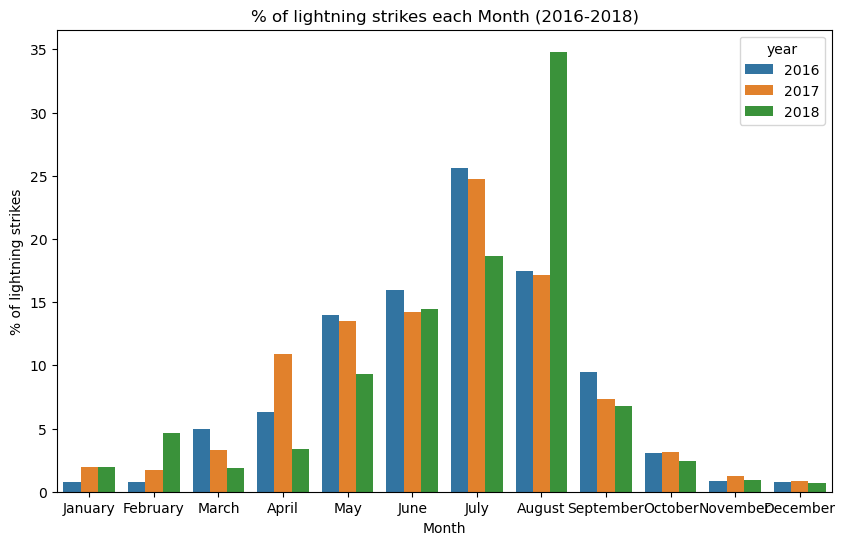

In [34]:
# Plotting the percentages by month in a graph
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

For all three years, there is a clear pattern over the course of each year. One month stands out: August. More than one third of the lightning strikes in 2018 happened in August. 

### 3.6. Creating new time columns

The `date` column data type is a string object, which limits what can be done with the data in this column. Converting the column to datetime will facilitate work with this data.  

In [42]:
# Converting the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

Next, I will create four new columns: `week`, `month`, `quarter`, and `year`. I can do this by using the `datetime.strftime()` method of the datetime object. `strftime` is short for "string format time." I will use this method on the datetime data in the `week` column, and it will extract the information I specify, formatted as a string. 

To specify the information to extract, I will use strftime format codes. In this case, I will use `%Y` for year, `%V` for week number, `%q` for quarter.

In [43]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

Using `head()` to check that the columns were created as intended.

In [44]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


### 3.7. Plotting the number of quarterly lightning strikes from 2016–2018

Next, I will plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. The following code will divide the `number_of_strikes` column by one million.

In [45]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

### 3.8. Formatting the numbers

This alone does not help much, because it just moved the decimal to the left. I will need to format the numbers as well.  I'll begin by grouping the data by quarter and summing.

Then, I will create a `number_of_strikes_formatted` column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [46]:
# Groupping 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

# Formatting as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### 3.9. Adding labels

Before I start plotting, I will write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x-axis coordinates, `y` represents the y-axis coordinates, and `s` represents the text that we want to appear at these coordinates. 

**Reference:** [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [47]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### 3.10. Plotting the bar graph

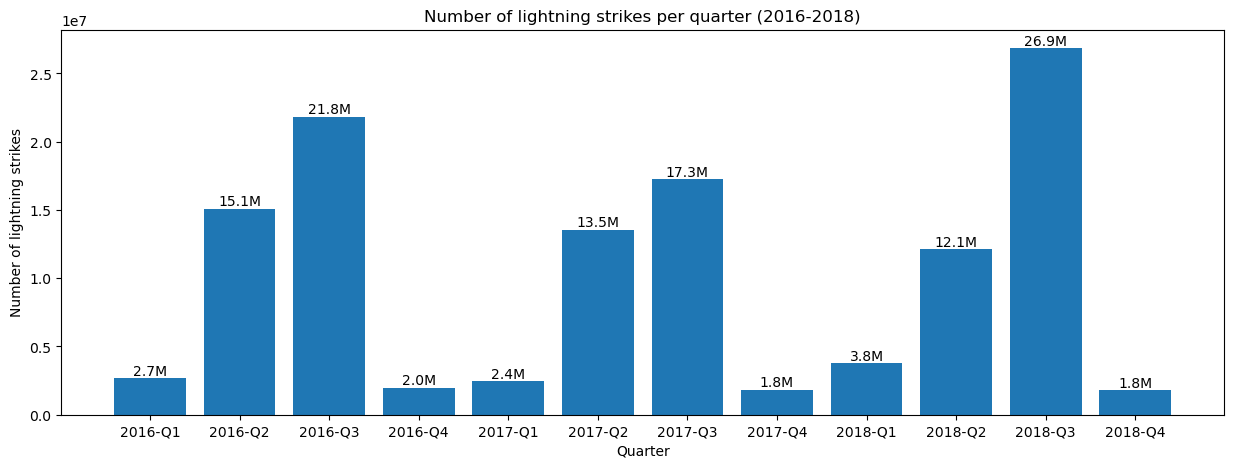

In [48]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2016-2018)')
plt.show()

### 3.11. Creating a grouped bar chart

Now, I will create a grouped bar chart to better compare year-over-year changes each quarter. I can do this by creating two new columns that break out the quarter and year from the `quarter` column. I will use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [49]:
# Creating two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


### 3.12. Filling in the chart parameters

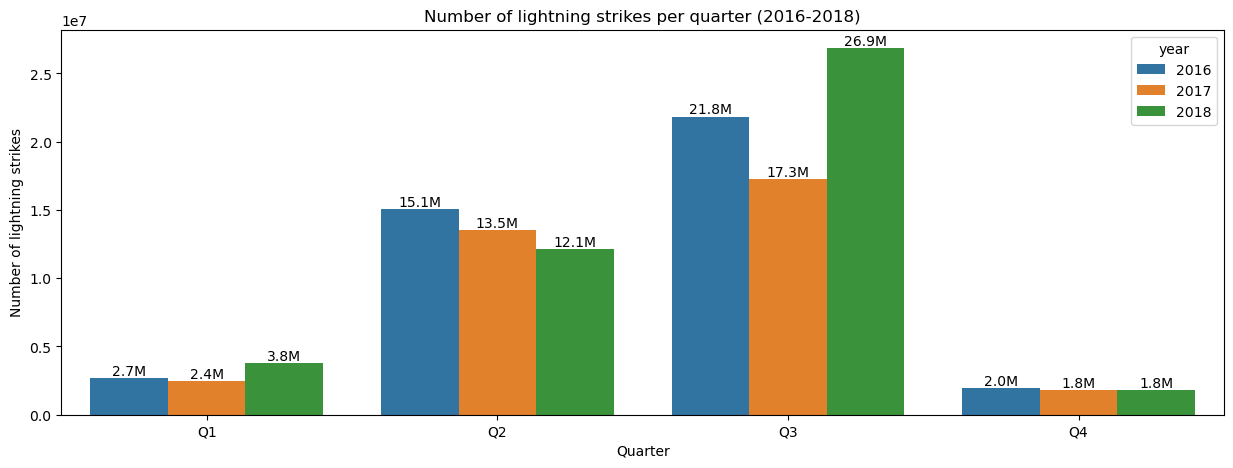

In [50]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

## 3.13. Label Encoding

## Objective

We will be examining monthly lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for 2016&ndash;2018. The dataset includes three columns:  

|date|number_of_strikes|center_point_geom|
|---|---|---|  

The objective is to assign the monthly number of strikes to the following categories: mild, scattered, heavy, or severe. Then we will create a heatmap of the three years so we can get a high-level understanding of monthly lightning severity from a simple diagram.   

I'll encode the months as categorical information. This allows me to specifically designate them as categories that adhere to a specific order, which is helpful when plotting them later. I'll also create a new `year` column. Then I'll group the data by year and month, sum the remaining columns, and assign the results to a new dataframe.

In [89]:
# The dataset to be used in this part of the analysis is the merged one I created in the beginning of the 
# notebook my merging the data for 2016-2017 with the data for 2018
df = union_df
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [90]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)

In [91]:
# Create categorical designations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Encode `month` column as categoricals 
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Create `year` column by extracting the year info from the datetime object
df['year'] = df['date'].dt.strftime('%Y')

# Create a new df of month, year, total strikes
df_by_month = df.groupby(['year', 'month']).sum(numeric_only=True).reset_index()
df_by_month.head()

,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500


Now I'll create a new column called `strike_level` that contains a categorical variable representing the lightning strikes for each month as mild, scattered, heavy, or severe. I'll use the `pd.qcut` pandas function for this. I just input the column to be categorized, the number of quantiles to sort the data into, and how we want to name each quantile. References: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html.

In [92]:
# Create a new column that categorizes number_of_strikes into 1 of 4 categories
df_by_month['strike_level'] = pd.qcut(
    df_by_month['number_of_strikes'],
    4,
    labels = ['Mild', 'Scattered', 'Heavy', 'Severe'])
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,313595,Mild
1,2016,Feb,312676,Mild
2,2016,Mar,2057527,Scattered
3,2016,Apr,2636427,Heavy
4,2016,May,5800500,Heavy


#### Encode `strike_level` into numerical values

Now that I have a categorical `strike_level` column, I can extract a numerical code from it using `.cat.codes` and assign this number to a new column. 

In [93]:
# Create new column representing numerical value of strike level
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Scattered,1
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Heavy,2


I can also create binary "dummy" variables from the `strike_level` column. This is a useful tool if I'd like to pass the categorical variable into a model. To do this, I could use the function `pd.get_dummies()`. Obs: the following step is just to demonstrate the functionality of `pd.get_dummies()` (simply calling the function as I will do below will not convert the data unless I reassigned the result back to a dataframe). 

`pd.get_dummies(df['column'])` 🠚 **df unchanged**  
`df = pd.get_dummies(df['column'])` 🠚 **df changed**

In [94]:
pd.get_dummies(df_by_month['strike_level'])

,Mild,Scattered,Heavy,Severe
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
5,False,False,False,True
6,False,False,False,True
7,False,False,False,True
8,False,False,True,False
9,False,True,False,False


I don't need to create dummy variables for our heatmap, so I'll continue without converting the dataframe.

### 3.14. Creating a heatmap of number of strikes per month

I want the heatmap to have the months on the x-axis and the years on the y-axis, and the color gradient should represent the severity (mild, scattered, heavy, severe) of lightning for each month. A simple way of preparing the data for the heatmap is to pivot it so the rows are years, columns are months, and the values are the numeric code of the lightning severity. 

I can do this with the `df.pivot()` method. It accepts arguments for `index`, `columns`, and `values`, which I'll specify as described. References: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html.

In [95]:
# Create new df that pivots the data
df_by_month_plot = df_by_month.pivot(index='year', columns='month', values='strike_level_code')
df_by_month_plot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2016,0,0,1,2,2,3,3,3,2,1,0,0
2017,0,0,1,2,2,2,3,2,1,1,0,0
2018,1,2,1,2,3,3,3,3,3,1,1,0


I'll use seaborn's `heatmap()` function to plot the heatmap.

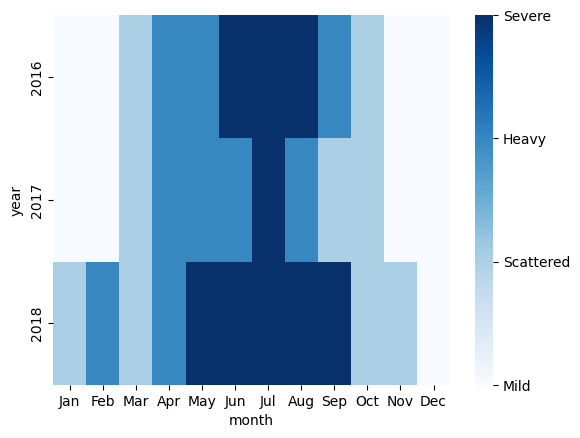

In [96]:
ax = sns.heatmap(df_by_month_plot, cmap = 'Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

The heatmap indicates that for all three years, the most lightning strikes occurred during the summer months.